In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

from sigmalypse.main import MetricsLab
from sigmalypse.main import MeasureBOda

In [29]:
lab = MetricsLab(units={"L": "cm", "M": "g", "T": "s"})
lab.add_table_from_csv("./practica_2/data/monedas.csv", name="Monedas", units={"diametro": "cm", "altura": "cm", "masa": "g"})
lab.add_table_from_csv("./practica_2/data/cubos.csv", name="Cubos de vidrio", units={"alto": "cm", "largo": "cm", "ancho": "cm", "masa": "g"})
lab.add_table_from_csv("./practica_2/data/tubos.csv", name="Tubos de cobre", units={"diametro": "cm", "grosor": "cm", "altura": "cm", "masa": "g"})
lab.add_table_from_csv("./practica_2/data/rondanas.csv", name="Rondanas", units={"diametro_ext":"cm", "diametro_int":"cm", "altura": "cm", "masa": "g"} )
lab.add_table_from_csv("./practica_2/data/canicas.csv", name="Canicas", units={"diametro": "cm", "masa": "g"})
lab.add_table_from_csv("./practica_2/data/agua.csv", name="Agua", units={"masa_acomulada": "g", "volumen_acomulado": "cm^3"})

Tabla 'Monedas' añadida exitosamente.
Tabla 'Cubos de vidrio' añadida exitosamente.
Tabla 'Tubos de cobre' añadida exitosamente.
Tabla 'Rondanas' añadida exitosamente.
Tabla 'Canicas' añadida exitosamente.
Tabla 'Agua' añadida exitosamente.


In [30]:
for table_name, table in lab.tables.items():
    if table_name != "Agua":
        for col_name, unit_type in table["units"].items():
            if unit_type == "cm":
                lab.add_uncertainty(table_name, col_name, "vernier")
            elif unit_type == "g":
                lab.add_uncertainty(table_name, col_name, "balanza granataria")

lab.add_uncertainty("Agua", "masa_acomulada", "balanza digital")
lab.add_uncertainty("Agua", "volumen_acomulado", "flexometro")

Incertidumbre agregada a la columna 'diametro' de la tabla 'Monedas' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 'altura' de la tabla 'Monedas' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 'masa' de la tabla 'Monedas' usando el instrumento 'balanza granataria'.
Incertidumbre agregada a la columna 'alto' de la tabla 'Cubos de vidrio' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 'largo' de la tabla 'Cubos de vidrio' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 'ancho' de la tabla 'Cubos de vidrio' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 'masa' de la tabla 'Cubos de vidrio' usando el instrumento 'balanza granataria'.
Incertidumbre agregada a la columna 'diametro' de la tabla 'Tubos de cobre' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 'grosor' de la tabla 'Tubos de cobre' usando el instrumento 'vernier'.
Incertidumbre agregada a la columna 

In [31]:
for table in lab.tables.values():
    print(table)

{'data':        diametro         altura       masa
0   1.7 ± 0.005  0.138 ± 0.005  2.2 ± 0.5
1   1.7 ± 0.005  0.134 ± 0.005  2.2 ± 0.5
2   1.7 ± 0.005  0.136 ± 0.005  2.1 ± 0.5
3   1.7 ± 0.005  0.136 ± 0.005  2.1 ± 0.5
4   1.7 ± 0.005  0.138 ± 0.005  2.2 ± 0.5
5   1.7 ± 0.005  0.134 ± 0.005  2.1 ± 0.5
6   1.7 ± 0.005  0.132 ± 0.005  2.1 ± 0.5
7   1.7 ± 0.005  0.134 ± 0.005  2.2 ± 0.5
8   1.7 ± 0.005  0.138 ± 0.005  2.1 ± 0.5
9   1.7 ± 0.005  0.134 ± 0.005  2.1 ± 0.5
10  1.7 ± 0.005  0.134 ± 0.005  2.1 ± 0.5
11  1.7 ± 0.005  0.134 ± 0.005  2.1 ± 0.5, 'units': {'diametro': 'cm', 'altura': 'cm', 'masa': 'g'}}
{'data':             alto         largo          ancho        masa
0  2.546 ± 0.005   2.5 ± 0.005    2.5 ± 0.005  37.8 ± 0.5
1  2.564 ± 0.005   2.6 ± 0.005  2.534 ± 0.005  38.7 ± 0.5
2    2.6 ± 0.005  2.59 ± 0.005    2.5 ± 0.005  38.5 ± 0.5, 'units': {'alto': 'cm', 'largo': 'cm', 'ancho': 'cm', 'masa': 'g'}}
{'data':         diametro         grosor         altura        masa
0  1.572

In [32]:
PI = 3.14

def vol_moneda(d: MeasureBOda, h: MeasureBOda) -> MeasureBOda:
    r = d / 2
    res = PI * r**2 * h
    return res.round(3)

def vol_cubo(a: MeasureBOda, b: MeasureBOda, c: MeasureBOda) -> MeasureBOda:
    res = a * b * c
    return res.round(3)

def vol_tubo(d: MeasureBOda, h: MeasureBOda, g: MeasureBOda) -> MeasureBOda:
    d2 = d - 2 * g
    res = ((d**2 - d2**2) * PI) / 4 * h
    return res.round(3)

def vol_rondana(d_ext: MeasureBOda, d_int: MeasureBOda, h: MeasureBOda) -> MeasureBOda:
    r1 = d_ext / 2
    r2 = d_int / 2
    v1 = PI * r1**2 * h
    v2 = PI * r2**2 * h
    res = v1 - v2
    return res.round(3)

def vol_canica(d: MeasureBOda) -> MeasureBOda:
    r = d / 2
    res = (4/3) * PI * r**3
    return res.round(3)

def calc_densidad(m: MeasureBOda, v:MeasureBOda) -> MeasureBOda:
    res = m / v
    return res.round(1)

In [33]:
lab.tables["Monedas"]["data"]["volumen"] = lab.tables["Monedas"]["data"].apply(
    lambda row: vol_moneda(d=row["diametro"], h=row["altura"]), axis=1)

lab.tables["Cubos de vidrio"]["data"]["volumen"] = lab.tables["Cubos de vidrio"]["data"].apply(
    lambda row: vol_cubo(a=row["alto"], b=row["largo"], c=row["ancho"]), axis=1)

lab.tables["Tubos de cobre"]["data"]["volumen"] = lab.tables["Tubos de cobre"]["data"].apply(
    lambda row: vol_tubo(d=row["diametro"], h=row["altura"], g=row["grosor"]), axis=1)

lab.tables["Rondanas"]["data"]["volumen"] = lab.tables["Rondanas"]["data"].apply(
    lambda row: vol_rondana(d_ext=row["diametro_ext"], d_int=row["diametro_int"], h=row["altura"]), axis=1)

lab.tables["Canicas"]["data"]["volumen"] = lab.tables["Canicas"]["data"].apply(
    lambda row: vol_canica(d=row["diametro"]), axis=1)

In [34]:
for table_name, table in lab.tables.items():
    if table_name != "Agua":
        if table_name == "Canicas":
            container = MeasureBOda(2.7, 0.5)
            table["data"]["masa"] = table["data"]["masa"].apply(lambda x: x - container)

        table["data"]["densidad"] = table["data"].apply(lambda val: calc_densidad(val["masa"], val["volumen"]), axis=1)
        table["data"]["volumen_acomulado"] = table["data"]["volumen"].cumsum()
        table["data"]["volumen_acomulado"] = table["data"]["volumen_acomulado"].apply(lambda val: val.round(3))
        table["data"]["masa_acomulada"] = table["data"]["masa"].cumsum()
        table["data"]["masa_acomulada"] = table["data"]["masa_acomulada"].apply(lambda val: val.round(1))

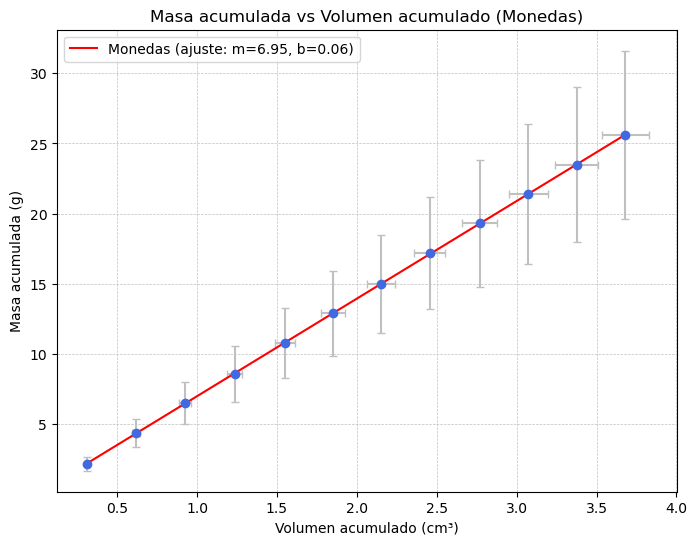

Monedas:
  Pendiente (m): 6.95 ± 0.01
  Intersección (b): 0.06
  Error estándar de la pendiente: 0.01



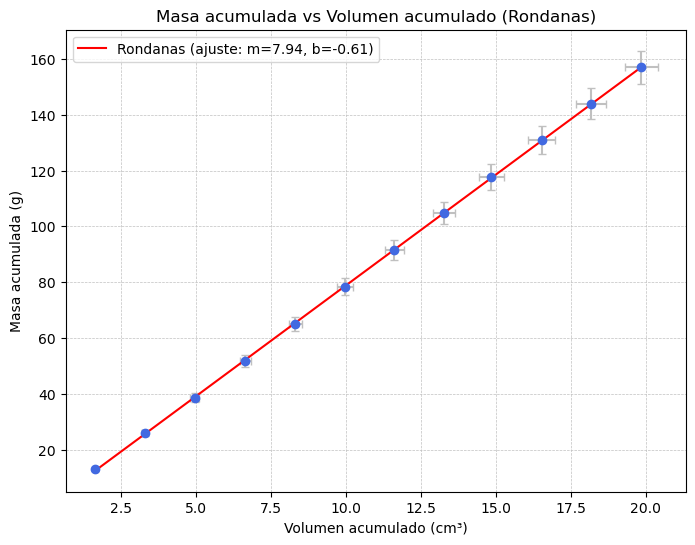

Rondanas:
  Pendiente (m): 7.94 ± 0.02
  Intersección (b): -0.61
  Error estándar de la pendiente: 0.02



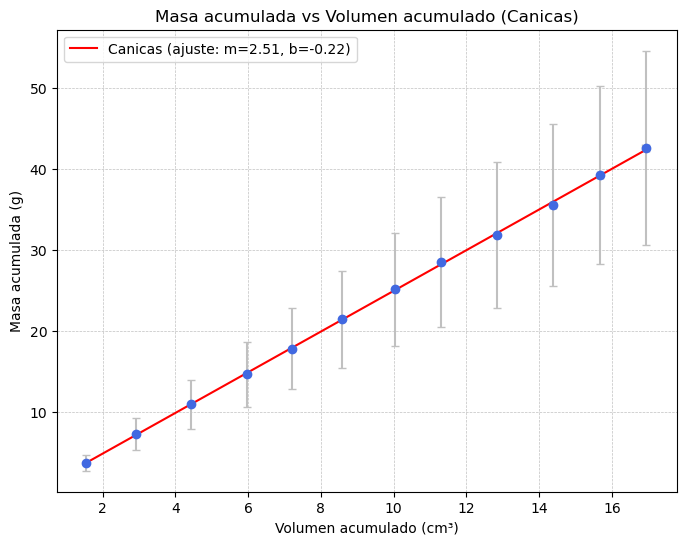

Canicas:
  Pendiente (m): 2.51 ± 0.01
  Intersección (b): -0.22
  Error estándar de la pendiente: 0.01



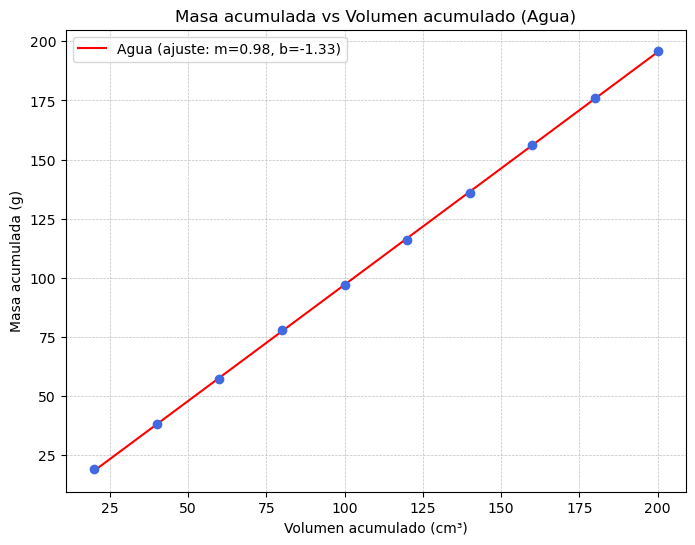

Agua:
  Pendiente (m): 0.98 ± 0.00
  Intersección (b): -1.33
  Error estándar de la pendiente: 0.00



In [35]:
for key, table in lab.tables.items():
    if key not in ["Cubos de vidrio", "Tubos de cobre"]:
        df = table["data"]

        masa = [v["x"] for v in df['masa_acomulada']]
        volumen = [v["x"] for v in df['volumen_acomulado']]
        incertidumbre_masa = [v["u"] for v in df['masa_acomulada']]
        incertidumbre_volumen = [v["u"] for v in df['volumen_acomulado']]

        # Ajuste de la línea con linregress (mínimos cuadrados)
        slope, intercept, r_value, p_value, std_err = linregress(volumen, masa)

        # Crear una figura para graficar los datos y el ajuste
        plt.figure(figsize=(8, 6))

        # Graficar los datos con barras de error
        plt.errorbar(volumen, masa, xerr=incertidumbre_volumen, yerr=incertidumbre_masa,
                     fmt='o', color='royalblue', label=f'', capsize=3, ecolor='silver')

        # Generar los valores para la línea de ajuste
        x_fit = np.linspace(min(volumen), max(volumen), 100)
        y_fit = slope * x_fit + intercept
        plt.plot(x_fit, y_fit, color='red', label=f'{key} (ajuste: m={slope:.2f}, b={intercept:.2f})')

        # Configurar etiquetas y título
        plt.xlabel('Volumen acumulado (cm³)')
        plt.ylabel('Masa acumulada (g)')
        plt.title(f'Masa acumulada vs Volumen acumulado ({key})')
        plt.grid(True, color='silver', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()

        # Imprimir resultados del ajuste
        print(f'{key}:')
        print(f"  Pendiente (m): {slope:.2f} ± {std_err:.2f}")
        print(f"  Intersección (b): {intercept:.2f}")
        print(f"  Error estándar de la pendiente: {std_err:.2f}\n")

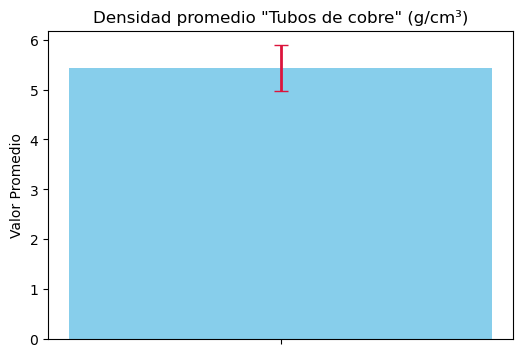

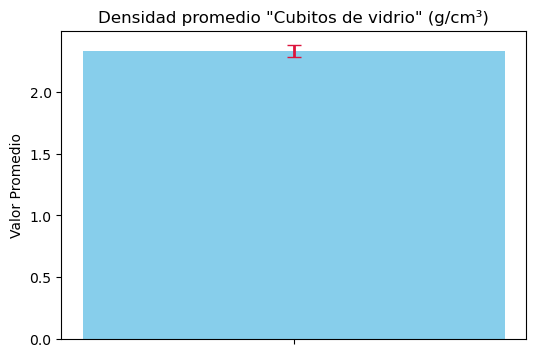

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Para la tabla "Tubos de cobre"
df_tubos = lab.tables["Tubos de cobre"]["data"]

# Extraer valores de la columna "densidad"
valores_tubos = []
for val in df_tubos["densidad"]:
    # Si el valor es una instancia de Measure o MeasureBOda, se utiliza su atributo x
    if hasattr(val, "x"):
        valores_tubos.append(val.x)
    else:
        valores_tubos.append(val)
valores_tubos = np.array(valores_tubos)

# Calcular el promedio y la desviación estándar de la densidad
promedio_tubos = np.mean(valores_tubos)
error_tubos = np.std(valores_tubos)

# Graficar el promedio para "tubos" con barras de error en color plateado
plt.figure(figsize=(6, 4))
plt.bar(0, promedio_tubos, yerr=error_tubos, capsize=5, color='skyblue',
        error_kw={'ecolor': 'crimson', 'elinewidth': 2})
plt.xticks([0], [""])
plt.ylabel("Valor Promedio")
plt.title("Densidad promedio \"Tubos de cobre\" (g/cm³)")
plt.show()


# Para la tabla "Cubos de vidrio"
df_cubos = lab.tables["Cubos de vidrio"]["data"]

# Extraer valores de la columna "densidad"
valores_cubos = []
for val in df_cubos["densidad"]:
    if hasattr(val, "x"):
        valores_cubos.append(val.x)
    else:
        valores_cubos.append(val)
valores_cubos = np.array(valores_cubos)

# Calcular el promedio y la desviación estándar de la densidad
promedio_cubos = np.mean(valores_cubos)
error_cubos = np.std(valores_cubos)

# Graficar el promedio para "Cubos de vidrio" con barras de error en color plateado
plt.figure(figsize=(6, 4))
plt.bar(0, promedio_cubos, yerr=error_cubos, capsize=5, color='skyblue',
        error_kw={'ecolor': 'crimson', 'elinewidth': 2})
plt.xticks([0], [""])
plt.ylabel("Valor Promedio")
plt.title("Densidad promedio \"Cubitos de vidrio\" (g/cm³)")
plt.show()

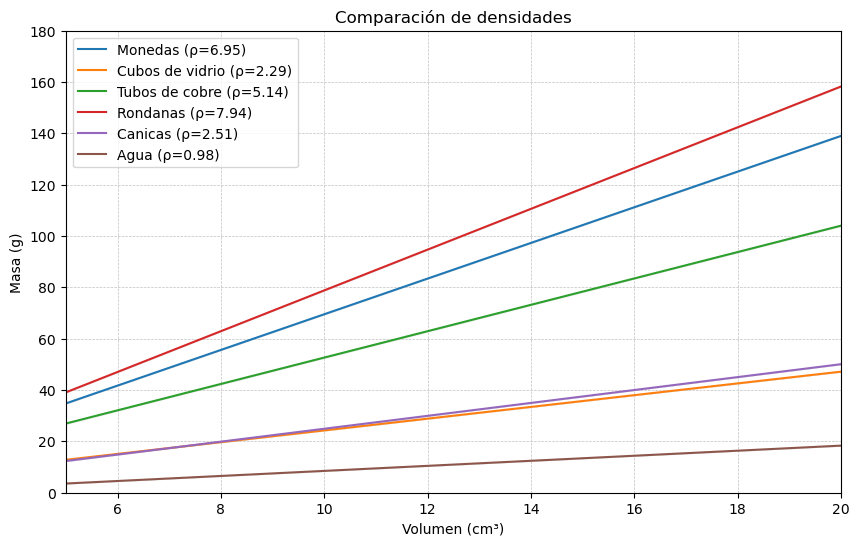

In [37]:
plt.figure(figsize=(10, 6))
colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_index = 0

for key, table in lab.tables.items():
    df = table["data"]

    # Extraer los valores de masa y volumen (se asume que cada valor es un diccionario con claves "x" y "u")
    masa = [row["x"] for row in df["masa_acomulada"]]
    volumen = [row["x"] for row in df["volumen_acomulado"]]
    masa = np.array(masa)
    volumen = np.array(volumen)

    # Ajuste lineal: usamos los datos (volumen -> masa)
    slope, intercept, r_value, p_value, std_err = linregress(volumen, masa)

    # Generar 100 puntos en el rango completo (0 a 100)
    x_fit = np.linspace(5, 20, 10)
    y_fit = slope * x_fit + intercept
    # Definir la banda de error
    y_upper = y_fit + std_err
    y_lower = y_fit - std_err

    color = colors[color_index % len(colors)]
    color_index += 1

    # Graficar la línea de ajuste completa y la banda de error
    plt.plot(x_fit, y_fit, color=color, linestyle='-',
             label=f"{key} (ρ={slope:.2f})")
    plt.fill_between(x_fit, y_lower, y_upper, color='silver', alpha=0.3)

# Configurar etiquetas y límites de ejes
plt.xlabel("Volumen (cm³)")
plt.ylabel("Masa (g)")
plt.title("Comparación de densidades")
plt.grid(True, color='silver', linestyle='--', linewidth=0.5)
plt.xlim(5, 20)
plt.ylim(0, 180)

# Obtener handles y labels para la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)
plt.show()

In [46]:
for key, table in lab.tables.items():
    df = table["data"]
    print(df.to_latex(
        caption=f"Resultados obtenidos {key}",
        position="htbp",
        column_format="lccc",
        escape=False,
    ))


\begin{table}[htbp]
\caption{Resultados obtenidos Monedas}
\begin{tabular}{lccc}
\toprule
 & diametro & altura & masa & volumen & densidad & volumen_acomulado & masa_acomulada \\
\midrule
0 & 1.7 ± 0.005 & 0.138 ± 0.005 & 2.2 ± 0.5 & 0.313 ± 0.013 & 7.0 ± 1.9 & 0.313 ± 0.013 & 2.2 ± 0.5 \\
1 & 1.7 ± 0.005 & 0.134 ± 0.005 & 2.2 ± 0.5 & 0.304 ± 0.012 & 7.2 ± 1.9 & 0.617 ± 0.025 & 4.4 ± 1.0 \\
2 & 1.7 ± 0.005 & 0.136 ± 0.005 & 2.1 ± 0.5 & 0.309 ± 0.012 & 6.8 ± 1.9 & 0.926 ± 0.037 & 6.5 ± 1.5 \\
3 & 1.7 ± 0.005 & 0.136 ± 0.005 & 2.1 ± 0.5 & 0.309 ± 0.012 & 6.8 ± 1.9 & 1.235 ± 0.049 & 8.6 ± 2.0 \\
4 & 1.7 ± 0.005 & 0.138 ± 0.005 & 2.2 ± 0.5 & 0.313 ± 0.013 & 7.0 ± 1.9 & 1.548 ± 0.062 & 10.8 ± 2.5 \\
5 & 1.7 ± 0.005 & 0.134 ± 0.005 & 2.1 ± 0.5 & 0.304 ± 0.012 & 6.9 ± 1.9 & 1.852 ± 0.074 & 12.9 ± 3.0 \\
6 & 1.7 ± 0.005 & 0.132 ± 0.005 & 2.1 ± 0.5 & 0.299 ± 0.012 & 7.0 ± 2.0 & 2.151 ± 0.086 & 15.0 ± 3.5 \\
7 & 1.7 ± 0.005 & 0.134 ± 0.005 & 2.2 ± 0.5 & 0.304 ± 0.012 & 7.2 ± 1.9 & 2.455 ± 0.098 